# SMV

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
import os
print(os.listdir("Iris"))

['IRIS.csv']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
iris=pd.read_csv('Iris/IRIS.csv')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


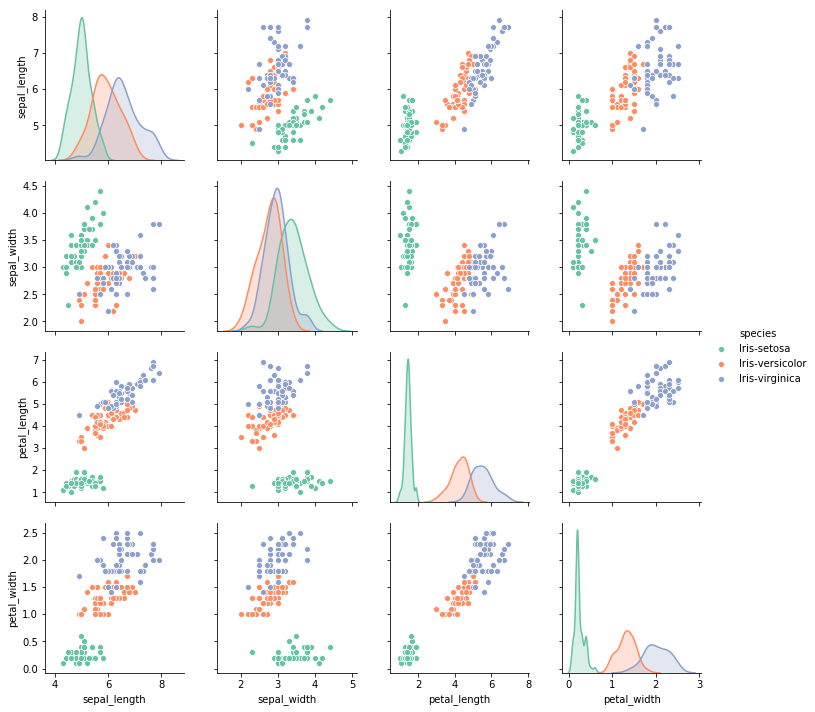

In [6]:
sns.pairplot(data=iris, hue='species', palette='Set2')

In [47]:
from sklearn.model_selection import train_test_split ,cross_val_score

In [18]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [19]:
from sklearn.svm import SVC
model=SVC()

In [20]:
model.fit(x_train, y_train)

SVC()

In [21]:
pred=model.predict(x_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y_test,pred))

[[ 9  0  0]
 [ 0 18  1]
 [ 0  0 17]]


In [24]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.95      0.97        19
 Iris-virginica       0.94      1.00      0.97        17

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [26]:
from sklearn.metrics import accuracy_score
acc_dec=accuracy_score(y_test, pred)
acc_dec

0.9777777777777777

In [27]:
#classification_report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         9
     class 1       1.00      0.95      0.97        19
     class 2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# KNN Classification

([<matplotlib.axis.XTick at 0x1261f04e0>,
 <a list of 10 Text xticklabel objects>)

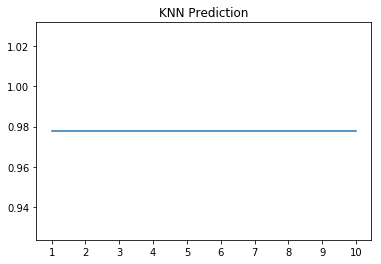

In [29]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    k_class=KNeighborsClassifier(n_neighbors=5) 
    k_class.fit(x_train,y_train)
    y_pred_neigh=k_class.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_pred_neigh,y_test)))
plt.plot(a_index, a)
plt.title("KNN Prediction")
plt.xticks(x)

Decision Boundary of Neighbour classifier

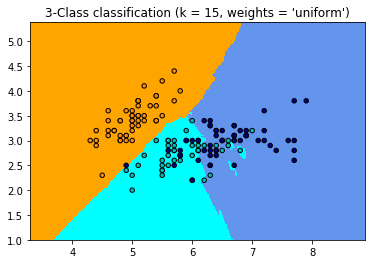

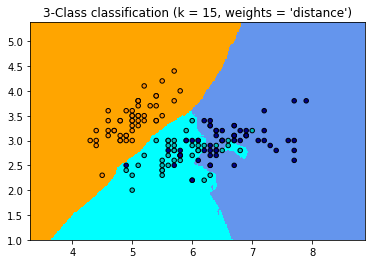

In [30]:
#KNN 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [36]:
y_test = np.array(list(y_test))
y_pred_neigh = np.array(y_pred_neigh)
kdf=pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred_neigh.flatten()})


Confusion Matrix

Confusion matrix, without normalization
[[41  0  0]
 [ 0 29  2]
 [ 0  1 32]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.93548387 0.06451613]
 [0.         0.03030303 0.96969697]]


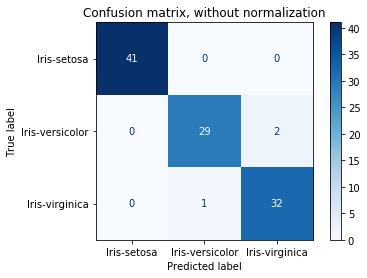

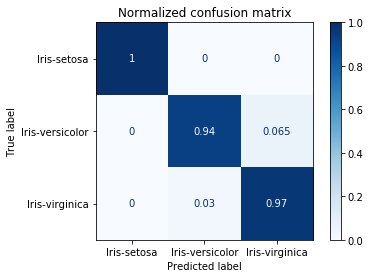

In [38]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
ca=confusion_matrix(y_test,y_pred_neigh)
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp=plot_confusion_matrix(k_class,x_train, y_train,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

Accuracy Score

In [40]:
#accuracy_score
from sklearn.metrics import accuracy_score
acc_knn=metrics.accuracy_score(y_test, y_pred_neigh)
acc_knn

0.9777777777777777

Classification Report

In [41]:
#classification_report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred_neigh, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         9
     class 1       1.00      0.95      0.97        19
     class 2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Classification report of the ML Models


In [44]:

print("Classification_Report of SVM : \n",classification_report(y_test, pred, target_names=target_names))
print("Classification_Report of KNN : \n",classification_report(y_test, y_pred_neigh, target_names=target_names))

Classification_Report of SVM : 
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         9
     class 1       1.00      0.95      0.97        19
     class 2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Classification_Report of KNN : 
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         9
     class 1       1.00      0.95      0.97        19
     class 2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

